# Importing Libraries

In [60]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\faisa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\faisa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\faisa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\faisa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\faisa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


# Tokenization

In [61]:
myfile = open('20th_century_content.txt', encoding='utf-8') 

In [62]:
# Import txt file
with open('20th_century_content.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [63]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokens = sent_tokenize(data)

# Convert all tokens to lowercase
tokenized_sent = [token.lower() for token in tokens]
print(tokenized_sent)

['from wikipedia, the free encyclopediathe 20th century changed the world in unprecedented ways.', 'the world wars sparked tension between countries and led to the creation of atomic bombs, the cold war led to the space race and the creation of space-based rockets, and the world wide web was created.', "these advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.historic events in the 20th century[edit]world at the beginning of the century[edit]main article: edwardian erathe new beginning of the 20th century marked significant changes.", 'the 1900s saw the decade herald a series of inventions, including the automobile, airplane and radio broadcasting.', '1914 saw the completion of the panama canal.the scramble for africa continued in the 1900s and resulted in wars and genocide across the continent.', 'the atrocities in the congo free state shocked the civilized world.from 1914 to 1918, the first world war, and its aftermath, ca

In [64]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['From', 'Wikipedia', ',', 'the', 'free', 'encyclopediaThe', '20th', 'century', 'changed', 'the', 'world', 'in', 'unprecedented', 'ways', '.', 'The', 'World', 'Wars', 'sparked', 'tension', 'between', 'countries', 'and', 'led', 'to', 'the', 'creation', 'of', 'atomic', 'bombs', ',', 'the', 'Cold', 'War', 'led', 'to', 'the', 'Space', 'Race', 'and', 'the', 'creation', 'of', 'space-based', 'rockets', ',', 'and', 'the', 'World', 'Wide', 'Web', 'was', 'created', '.', 'These', 'advancements', 'have', 'played', 'a', 'significant', 'role', 'in', 'citizens', "'", 'lives', 'and', 'shaped', 'the', '21st', 'century', 'into', 'what', 'it', 'is', 'today.Historic', 'events', 'in', 'the', '20th', 'century', '[', 'edit', ']', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '[', 'edit', ']', 'Main', 'article', ':', 'Edwardian', 'eraThe', 'new', 'beginning', 'of', 'the', '20th', 'century', 'marked', 'significant', 'changes', '.', 'The', '1900s', 'saw', 'the', 'decade', 'herald', 'a', 'series', '

In [65]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4779 samples and 21258 outcomes>


In [66]:
dist_words.most_common(10)

[('.', 1321),
 ('the', 1117),
 (',', 976),
 ('of', 612),
 ('and', 408),
 ('to', 325),
 ('[', 309),
 (']', 309),
 ('The', 301),
 ('in', 298)]

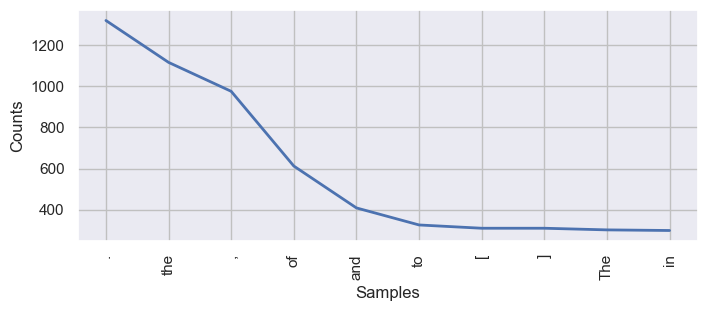

In [67]:
# Visualize using plot
plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

# Stopwords

In [68]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'who', 'his', 'them', 'y', 'as', 'he', "i'd", "i've", 'when', "she'd", 'between', 'to', 'now', 'whom', 'couldn', 'ourselves', 'you', 'don', 'ours', 't', "isn't", 'or', "couldn't", 'won', 'no', 'which', 's', 'we', 'on', 'up', "hasn't", 'theirs', 'be', "they'll", 'wouldn', "we're", 'had', "haven't", "you'd", 'aren', 'all', 'its', "mightn't", "we'll", 'the', 'what', 'mustn', 'after', 'each', "didn't", 'off', 'she', 'under', 'how', "it's", "wouldn't", "you've", 'hers', 'wasn', 'into', 'why', 'did', 'doing', 'further', "she'll", 'then', 'an', "shouldn't", 'with', 'too', 'mightn', 'should', 'your', "we'd", 'himself', 'weren', 'more', "needn't", 'at', 'have', 'and', 'yours', 'being', 'yourselves', 'was', 'such', 'd', 'does', 'themselves', 'through', 'it', 'here', 'just', 'only', "weren't", 'nor', 'yourself', 'for', 'can', "they'd", "shan't", 'against', 'those', 'myself', 'shouldn', 'this', 'will', "she's", 'down', 'haven', 'out', 'from', 'my', 'our', 'their', 'ain', 'they', "they've", "don't

In [69]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [70]:
filtered_words

['From',
 'Wikipedia',
 ',',
 'free',
 'encyclopediaThe',
 '20th',
 'century',
 'changed',
 'world',
 'unprecedented',
 'ways',
 '.',
 'The',
 'World',
 'Wars',
 'sparked',
 'tension',
 'countries',
 'led',
 'creation',
 'atomic',
 'bombs',
 ',',
 'Cold',
 'War',
 'led',
 'Space',
 'Race',
 'creation',
 'space-based',
 'rockets',
 ',',
 'World',
 'Wide',
 'Web',
 'created',
 '.',
 'These',
 'advancements',
 'played',
 'significant',
 'role',
 'citizens',
 "'",
 'lives',
 'shaped',
 '21st',
 'century',
 'today.Historic',
 'events',
 '20th',
 'century',
 '[',
 'edit',
 ']',
 'World',
 'beginning',
 'century',
 '[',
 'edit',
 ']',
 'Main',
 'article',
 ':',
 'Edwardian',
 'eraThe',
 'new',
 'beginning',
 '20th',
 'century',
 'marked',
 'significant',
 'changes',
 '.',
 'The',
 '1900s',
 'saw',
 'decade',
 'herald',
 'series',
 'inventions',
 ',',
 'including',
 'automobile',
 ',',
 'airplane',
 'radio',
 'broadcasting',
 '.',
 '1914',
 'saw',
 'completion',
 'Panama',
 'Canal.The',
 'Scra

In [71]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4676 samples and 16543 outcomes>


In [72]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [73]:
sans_punc

'  From    Wikipedia         free    encyclopediaThe      th    century    changed    world    unprecedented    ways         The    World    Wars    sparked    tension    countries    led    creation    atomic    bombs         Cold    War    led    Space    Race    creation    space based    rockets         World    Wide    Web    created         These    advancements    played    significant    role    citizens         lives    shaped      st    century    today Historic    events      th    century         edit         World    beginning    century         edit         Main    article         Edwardian    eraThe    new    beginning      th    century    marked    significant    changes         The        s    saw    decade    herald    series    inventions         including    automobile         airplane    radio    broadcasting                 saw    completion    Panama    Canal The    Scramble    Africa    continued        s    resulted    wars    genocide    across    continent  

In [74]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['From', 'Wikipedia', 'free', 'encyclopediaThe', 'th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'The', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', 'st', 'century', 'today', 'Historic', 'events', 'th', 'century', 'edit', 'World', 'beginning', 'century', 'edit', 'Main', 'article', 'Edwardian', 'eraThe', 'new', 'beginning', 'th', 'century', 'marked', 'significant', 'changes', 'The', 's', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcasting', 'saw', 'completion', 'Panama', 'Canal', 'The', 'Scramble', 'Africa', 'continued', 's', 'resulted', 'wars', 'genocide', 'across', 'continent', 'The', 'atrocities', 'Congo', 'Free', 'State', 'shocked', 'civilized', 'world', 'From', 'F

In [75]:
# Create frequency distribution for tokenized_word_2

dist_words_2 = FreqDist(tokenized_word_2)
print(dist_words_2)

<FreqDist with 4047 samples and 10836 outcomes>


In [76]:
dist_words_2.most_common(15)

[('The', 311),
 ('December', 225),
 ('Retrieved', 208),
 ('War', 122),
 ('s', 90),
 ('war', 87),
 ('World', 75),
 ('Soviet', 62),
 ('Hitler', 50),
 ('History', 42),
 ('Germany', 41),
 ('first', 41),
 ('ISBN', 40),
 ('world', 37),
 ('German', 35)]

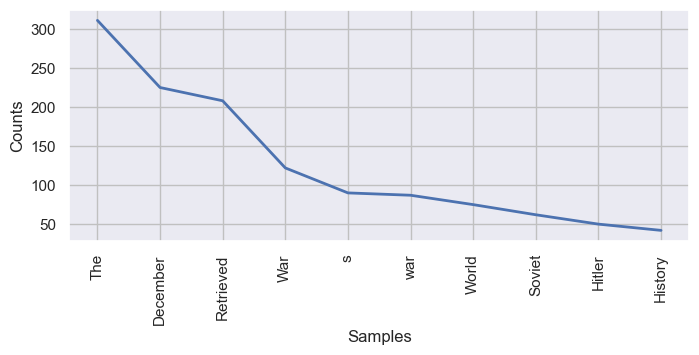

In [77]:
# Visualize using plot
plt.figure(figsize=(8, 3))
dist_words_2.plot(10,cumulative = False)
plt.show()

- Most of the words that have no meaning are filtered out.

# POS tags with Textblob

In [78]:
new_stopwords = ["The", "s"]
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [79]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 15.6 ms
Wall time: 9.86 ms


In [82]:
text

TextBlob("['From', 'Wikipedia', 'free', 'encyclopediaThe', 'th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', 'st', 'century', 'today', 'Historic', 'events', 'th', 'century', 'edit', 'World', 'beginning', 'century', 'edit', 'Main', 'article', 'Edwardian', 'eraThe', 'new', 'beginning', 'th', 'century', 'marked', 'significant', 'changes', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcasting', 'saw', 'completion', 'Panama', 'Canal', 'Scramble', 'Africa', 'continued', 'resulted', 'wars', 'genocide', 'across', 'continent', 'atrocities', 'Congo', 'Free', 'State', 'shocked', 'civilized', 'world', 'From', 'First', 'World', 'War', 'afte

In [83]:
tags_list = text.tags

In [84]:
tags_list

[('[', 'NN'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'encyclopediaThe", 'NNP'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'changed", 'VBD'),
 ("'world", 'NNP'),
 ("'", 'POS'),
 ("'unprecedented", 'VBD'),
 ("'ways", 'NNS'),
 ("'", 'POS'),
 ("'World", 'NNP'),
 ("'", 'POS'),
 ("'Wars", 'NNS'),
 ("'", 'POS'),
 ("'sparked", 'VBD'),
 ("'tension", 'NNP'),
 ("'", 'POS'),
 ("'countries", 'NNS'),
 ("'", 'POS'),
 ("'led", 'VBD'),
 ("'creation", 'NNP'),
 ("'", 'POS'),
 ("'atomic", 'NNP'),
 ("'", 'POS'),
 ("'War", 'NNP'),
 ("'", 'POS'),
 ("'led", 'VBD'),
 ("'Space", 'NNP'),
 ("'", 'POS'),
 ("'Race", 'NNP'),
 ("'", 'POS'),
 ("'creation", 'NN'),
 ("'space", 'NNP'),
 ("'", 'POS'),
 ("'based", 'VBD'),
 ("'rockets", 'NNS'),
 ("'", 'POS'),
 ("'World", 'NNP'),
 ("'", 'POS'),
 ("'Wide", 'NNP'),
 ("'", 'POS'),
 ("'Web", 'NNP'),
 ("'", 'POS'),
 ("'created", 'VBD'),
 ("'These", 'JJ'),
 ("'advancements", 'NNS'),
 ("'", 'POS'),
 ("'significant", 'NNP'),
 ("'", 'PO

In [85]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]
df_t=df_text.groupby('Word type').count().reset_index()
top10=df_t.nlargest(10, 'Words')

In [86]:
df_text.head()

,Words,Word type
0,[,NN
1,'Wikipedia,NNP
2,',POS
3,'encyclopediaThe,NNP
4,',POS


In [87]:
df_t = df_text.groupby('Word type').count().reset_index()

In [88]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,76
2,DT,12
3,EX,13
4,FW,42


In [89]:
top10 = df_t.nlargest(10, 'Words')

Text(0.5, 1.0, '20th Century - top 10 word types used')

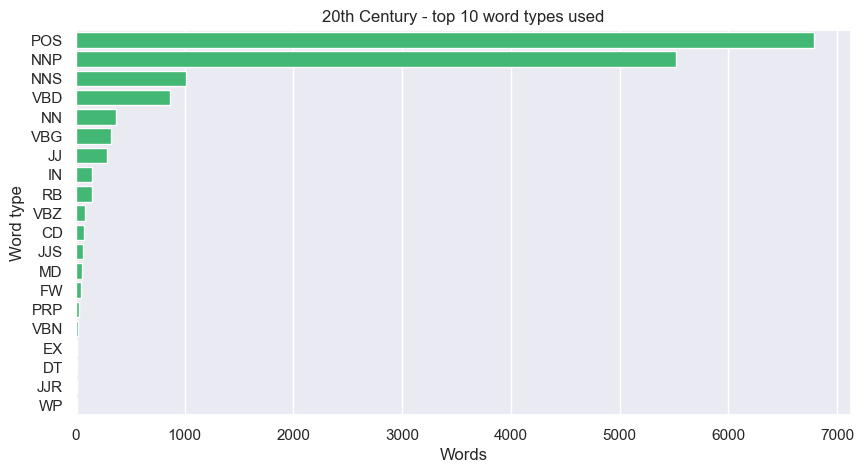

In [90]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="Words",
    y="Word type",
    data=top20,
    color="#2ecc71"
).set_title("20th Century - top 10 word types used")

## Nouns

In [91]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15_noun = y.nlargest(15, 'Occurences')

In [92]:
top15_noun

,Word,Occurences
289,'December,225
1270,'War,122
2570,'war,87
1314,'World,75
1119,'Soviet,62
542,'Hitler,50
541,'History,42
1777,'first,41
568,'ISBN,40
2596,'world,37


Text(0.5, 1.0, '20th Century - top 10 Nouns used')

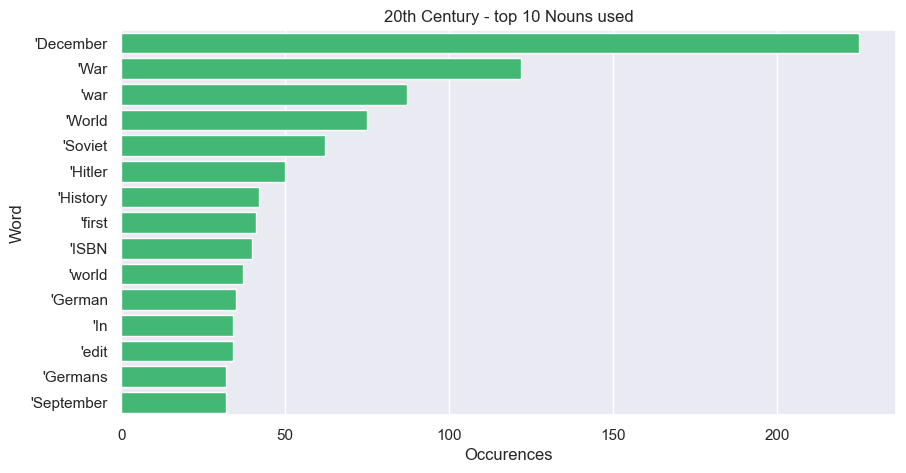

In [96]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="Occurences",
    y="Word",
    data=top15_noun,
    color="#2ecc71"
).set_title("20th Century - top 10 Nouns used")

## Verbs

In [93]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15_verb = y.nlargest(10, 'Occurences')

In [94]:
top15_verb

,Word,Occurences
27,'Retrieved,208
36,'United,31
0,'Allied,18
194,'led,15
1,'Archived,14
318,'used,13
192,'launched,12
92,'controlled,9
158,'forced,8
310,'turned,7


Text(0.5, 1.0, '20th Century - top 10 Verbs used')

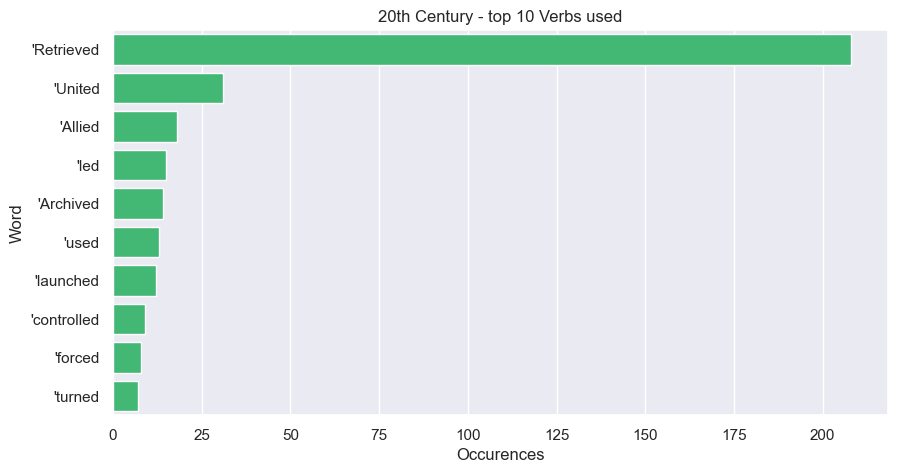

In [99]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="Occurences",
    y="Word",
    data=top15_verb,
    color="#2ecc71"
).set_title("20th Century - top 10 Verbs used")

## Adjectives

In [103]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15_adj = y.nlargest(10, 'Occurences')

In [104]:
top15_adj

,Word,Occurences
27,'Japanese,35
2,'American,24
5,'Atlantic,13
19,'Guardian,10
13,'Chinese,7
1,'African,6
105,'political,6
41,'Russian,6
93,'medical,5
7,'Baltic,5


Text(0.5, 1.0, '20th Century - top 10 Adjectives used')

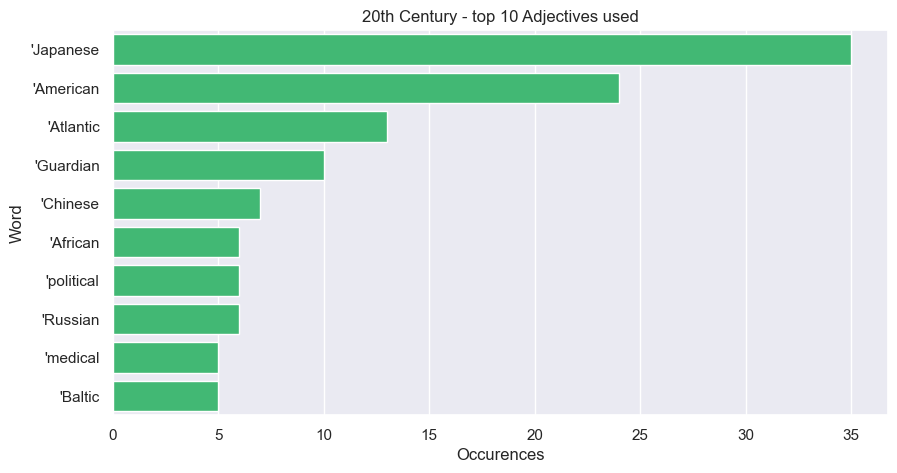

In [105]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="Occurences",
    y="Word",
    data=top15_adj,
    color="#2ecc71"
).set_title("20th Century - top 10 Adjectives used")

- In this particular article There is a huge focus on World wars, and a lot of mentions of Germany, War, and months of September and December.
- Countries involved in World Wars are also mentioned frequently including USA, Japan, Germany, Allies and Soviet union.

# Country mention counts

In [253]:
listToStr = ' '.join([str(elem) for elem in filtered])
print(listToStr)

From Wikipedia free encyclopediaThe th century changed world unprecedented ways World Wars sparked tension countries led creation atomic bombs Cold War led Space Race creation space based rockets World Wide Web created These advancements played significant role citizens lives shaped st century today Historic events th century edit World beginning century edit Main article Edwardian eraThe new beginning th century marked significant changes saw decade herald series inventions including automobile airplane radio broadcasting saw completion Panama Canal Scramble Africa continued resulted wars genocide across continent atrocities Congo Free State shocked civilized world From First World War aftermath caused major changes power balance world destroying transforming powerful empires war end wars World War I edit Main article World War IArrest suspect Sarajevo following Assassination Archduke Franz FerdinandThe First World War simply WWI termed Great War contemporaries started July ended Nove

In [254]:
# creating aliases to fix inconsistency in text
aliases = {
    r'\b(germany|german|germans)\b': 'germany',
    r'\b(italy|italian|italians)\b': 'italy',
    r'\b(japan|japanese)\b': 'japan',
    r'\b(american|usa|united states|united states of america|america)\b': 'usa',
    r'\b(france|french)\b': 'france',
    r'\b(poland|polish)\b': 'poland',
    r'\b(vietnam|vietnamese)\b': 'vietnam',
    r'\b(india|indian)\b': 'india',
    r'\b(russia|russian|soviet union)\b': 'russia',
    r'\b(austia|austrian)\b': 'austria'
}

In [255]:
listToStr = listToStr.lower()

In [256]:
listToStr

'from wikipedia free encyclopediathe th century changed world unprecedented ways world wars sparked tension countries led creation atomic bombs cold war led space race creation space based rockets world wide web created these advancements played significant role citizens lives shaped st century today historic events th century edit world beginning century edit main article edwardian erathe new beginning th century marked significant changes saw decade herald series inventions including automobile airplane radio broadcasting saw completion panama canal scramble africa continued resulted wars genocide across continent atrocities congo free state shocked civilized world from first world war aftermath caused major changes power balance world destroying transforming powerful empires war end wars world war i edit main article world war iarrest suspect sarajevo following assassination archduke franz ferdinandthe first world war simply wwi termed great war contemporaries started july ended nov

In [257]:
# applying the aliases into the text
for pattern, replacement in aliases.items():
    listToStr = re.sub(pattern, replacement, listToStr)

print(listToStr)

from wikipedia free encyclopediathe th century changed world unprecedented ways world wars sparked tension countries led creation atomic bombs cold war led space race creation space based rockets world wide web created these advancements played significant role citizens lives shaped st century today historic events th century edit world beginning century edit main article edwardian erathe new beginning th century marked significant changes saw decade herald series inventions including automobile airplane radio broadcasting saw completion panama canal scramble africa continued resulted wars genocide across continent atrocities congo free state shocked civilized world from first world war aftermath caused major changes power balance world destroying transforming powerful empires war end wars world war i edit main article world war iarrest suspect sarajevo following assassination archduke franz ferdinandthe first world war simply wwi termed great war contemporaries started july ended nove

In [258]:
# Create a count for countries
all_counts = Counter(re.sub(r'\W+', ' ', listToStr.lower()).split())

In [259]:
all_counts

Counter({'december': 225,
         'war': 210,
         'retrieved': 208,
         'world': 112,
         'germany': 108,
         'history': 76,
         'japan': 68,
         'new': 54,
         'first': 54,
         'usa': 52,
         'hitler': 50,
         'russia': 47,
         'isbn': 40,
         'battle': 39,
         'nuclear': 39,
         'would': 38,
         'century': 36,
         'in': 35,
         'edit': 34,
         'september': 32,
         'soviet': 31,
         's': 30,
         'issn': 30,
         'ii': 29,
         'became': 29,
         'space': 28,
         'end': 28,
         'july': 28,
         'france': 28,
         'also': 28,
         'august': 28,
         'weapons': 28,
         'europe': 27,
         'th': 26,
         'nations': 26,
         'u': 26,
         'a': 26,
         'many': 25,
         'june': 25,
         'com': 25,
         'army': 24,
         'april': 24,
         'october': 24,
         'computer': 24,
         'africa': 23,
       

In [260]:
countries = pd.read_csv("countries_list_20th_century_1.5.csv", index_col = 0)

In [261]:
countries.head(20)

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola
6,Antigua and Barbuda
7,Argentina
8,Armenia
9,Australia
10,Austria


In [262]:
country_list = [countries.strip().lower() for countries in countries['country_name'].tolist()]

In [263]:
country_list

['afghanistan',
 'albania',
 'algeria',
 'andorra',
 'angola',
 'antigua and barbuda',
 'argentina',
 'armenia',
 'australia',
 'austria',
 'azerbaijan',
 'bahamas, the',
 'bahrain',
 'bangladesh',
 'barbados',
 'belarus',
 'belgium',
 'belize',
 'benin',
 'bhutan',
 'bolivia',
 'bosnia and herzegovina',
 'botswana',
 'brazil',
 'brunei',
 'bulgaria',
 'burkina faso',
 'burundi',
 'cambodia',
 'cameroon',
 'canada',
 'cape verde',
 'central african republic',
 'chad',
 'chile',
 "china, people's republic of",
 'colombia',
 'comoros',
 'congo, democratic republic of the',
 'congo, republic of the',
 'costa rica',
 'croatia',
 'cuba',
 'cyprus',
 'czech republic',
 'denmark',
 'djibouti',
 'dominica',
 'dominican republic',
 'east timor',
 'ecuador',
 'egypt',
 'el salvador',
 'equatorial guinea',
 'eritrea',
 'estonia',
 'eswatini',
 'ethiopia',
 'fiji',
 'finland',
 'france',
 'gabon',
 'gambia, the',
 'georgia',
 'germany',
 'ghana',
 'greece',
 'grenada',
 'guatemala',
 'guinea',
 'g

In [264]:
dict_of_counts = {d : all_counts[d] for d in country_list}

In [265]:
sorted_dict = dict(sorted(dict_of_counts.items(), key=lambda item: item[1], reverse=True))

In [266]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in sorted_dict.items()}  
df = pd.DataFrame(dct)

In [267]:
df

,germany,japan,russia,france,italy,poland,vietnam,india,austria,libya,...,donetsk people's republic,kosovo,luhansk people's republic,niue,northern cyprus,sahrawi arab democratic republic,somaliland,south ossetia,taiwan,transnistria
0,108,68,47,28,23,16,16,12,5,5,...,0,0,0,0,0,0,0,0,0,0


In [268]:
df = df.transpose().reset_index()

In [269]:
df

,index,0
0,germany,108
1,japan,68
2,russia,47
3,france,28
4,italy,23
...,...,...
203,sahrawi arab democratic republic,0
204,somaliland,0
205,south ossetia,0
206,taiwan,0


In [270]:
df.rename(columns ={'index': 'country', 0: 'times_mentioned'}, inplace= True)

In [271]:
df1 = df.head(10)

Text(0.5, 1.0, '20th Century - most frequently mentioned countries')

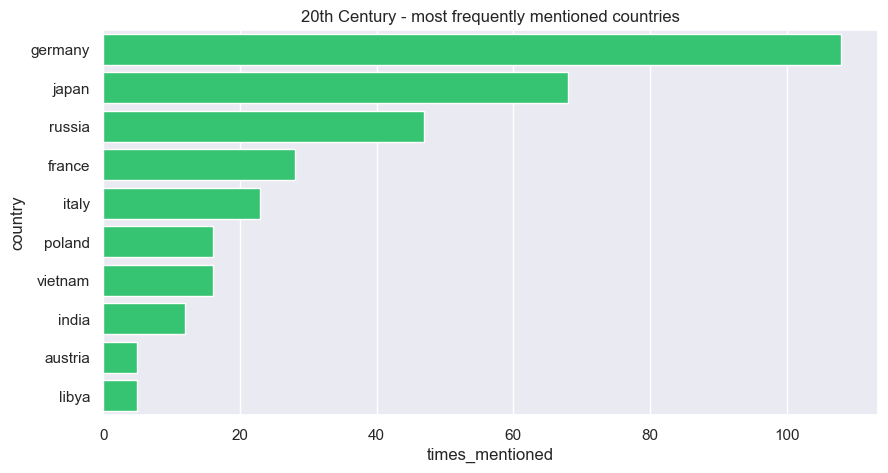

In [272]:
# visualization of countries' freqency
plt.figure(figsize=(10, 5))
sns.barplot(x = "times_mentioned", y = "country", color="#2ecc71", 
    saturation=0.9, data = df1.sort_values("times_mentioned", ascending = False)).set_title("20th Century - most frequently mentioned countries")

- The countries mentioned in the article were the ones highly active during the world wars.

# Sentiment Analysis

- The theme of the 20th Century and the war is on the negative so I would assume the sentiment is also negative.

In [273]:
text_sent = TextBlob(str(filtered))

In [274]:
print(text_sent.sentiment)

Sentiment(polarity=0.05002026361916465, subjectivity=0.3541880527193287)


- The sentiment seems to be closer to 0 meaning neither negative or positive.
- With a score of 0.35 in subjectivity, the text seems to be slightly objective.